### **Please submit the different parts of Module 4 in separate notebooks.**

# Module 4, Part 2

Please complete this assignment in a Colab.  

Please submit all parts of the Module 4 assignment as separate notebooks in the Canvas assignment for Module 4 ("Module 4 Assignment").

### **Please submit the different parts of Module 4 in separate notebooks.**

# Section 0: Setup & Initialization 

In [ ]:
# importing required libraries
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# creating features for k means clustering; default number of features is 2
# data belonging to each cluster is labeled with 0, 1...k where k is the number of clusters
features, true_labels = make_blobs(n_samples = 450, centers = 3, cluster_std = 1.5, random_state = 100)

In [ ]:
# converting the features to dataframe format and printing them
features = pd.DataFrame(features)
features.head(5)

,0,1
0,-1.797752,6.544419
1,-7.524641,-6.537101
2,1.503285,-4.671888
3,-1.013041,6.345778
4,1.473496,-7.259864


In [ ]:
# printing the true labels (this is the target variable/class assignment ground truth)
true_labels

array([1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2,
       0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2,

## Section 1: Kmeans Clustering

### 1\. Apply standard scaling to the data & convert to data frame format

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(features)
scaled_features = pd.DataFrame(scaled_features)

In [ ]:
scaled_features

,0,1
0,0.343416,1.285146
1,-0.821868,-0.738878
2,1.015097,-0.450285
3,0.503086,1.254411
4,1.009036,-0.850707
...,...,...
445,1.502105,-0.239802
446,0.874356,-0.220276
447,0.425716,-0.388225
448,0.710345,1.542002


### 2\. Create a scatter plot of the data, where each cluster is plotted in a different color

In [ ]:
import seaborn as sns

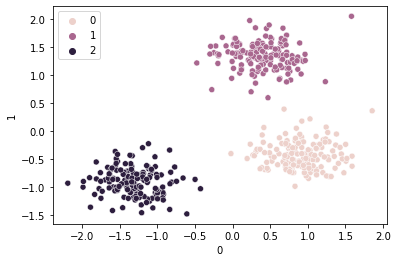

In [ ]:
sns.scatterplot(x = scaled_features[0], y = scaled_features[1], hue = true_labels)

### 3\.  Create an elbow curve for the data with k ranging from 1 to 11

Hint: use intertia_ computed by Kmeans for the y-axis

In [ ]:
inertias = []
for i in range(1, 12):
  # use to_numpy so we can reshape it
  kmeans = KMeans(n_clusters = i).fit(scaled_features)
  inertias.append(kmeans.inertia_)

In [ ]:
xs = [1,2,3,4,5,6,7,8,9,10,11]

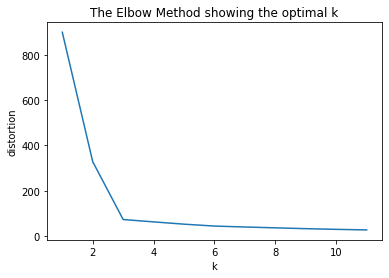

In [ ]:
plt.plot(xs, inertias)
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 4\. Run the kmeans algorithm on the data using k = 3

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(scaled_features)

In [ ]:
pred = kmeans.predict(scaled_features)

### 5\. Create a scatter plot of the predictions, where the data points belonging to each predicted cluster are plotted in a different color

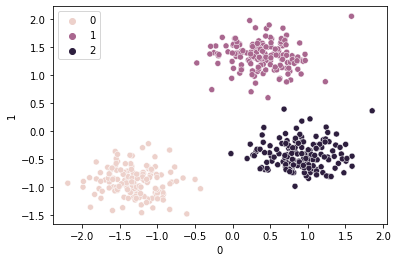

In [ ]:
sns.scatterplot(x = scaled_features[0], y = scaled_features[1], hue = pred)

## Section 2: Density-Based Clustering

In [ ]:
# creating features for dbscan clustering
features, true_labels = make_moons(n_samples = 450, noise = 0.05, random_state = 100)
features = pd.DataFrame(features)
features.head(3)

,0,1
0,-0.941722,0.287927
1,1.837622,0.002209
2,0.771527,-0.496647


In [ ]:
# cluster labels
true_labels

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,

### 1\. Use standard scaling on the data and convert to a data frame

In [ ]:
scaler.fit(features)
scaled_features = scaler.transform(features)
scaled_features = pd.DataFrame(scaled_features)

### 2\. Create a scatter plot of the data, using a different color for the data points that belong to each cluster

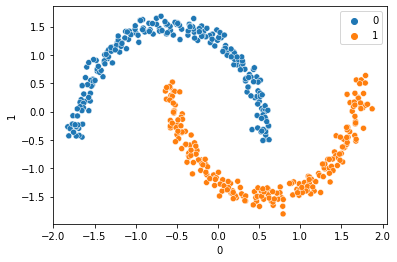

In [ ]:
sns.scatterplot(x = scaled_features[0], y = scaled_features[1], hue = true_labels)

### 3\. Apply Kmeans with k = 2 to the dataset

In [ ]:
kmeans = KMeans(n_clusters = 2).fit(scaled_features)

### 4\. Create a scatter plot of the predictions, where the data points belonging to each predicted cluster are plotted in a different color

In [ ]:
pred = kmeans.predict(scaled_features)

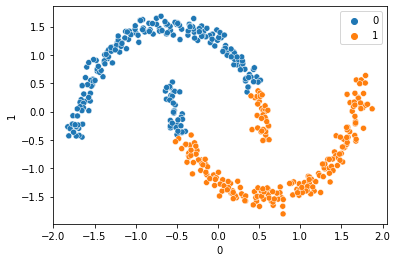

In [ ]:
sns.scatterplot(x = scaled_features[0], y = scaled_features[1], hue = pred)

### 5\. Apply DBSCAN to the dataset with parameters eps = 0.25 and min_samples = 5

In [ ]:
cluster_predict = DBSCAN(eps = 0.25, min_samples = 5).fit_predict(scaled_features)

### 6\. Create a scatter plot of the predictions, where the data points belonging to each predicted cluster are plotted in a different color

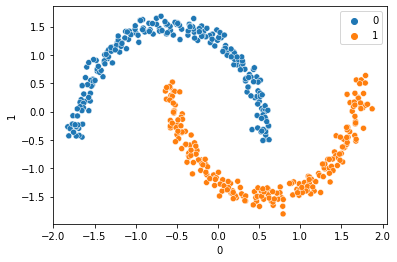

In [ ]:
sns.scatterplot(x = scaled_features[0], y = scaled_features[1], hue = cluster_predict)

### 7\.  What are your observations about how the outputs of kmeans and dbscan differ?

dbscan seems to perform a better job at clustering

## Section 3: Hierarchical Clustering

In [ ]:
# creating a dataset for hierarchical clustering
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])

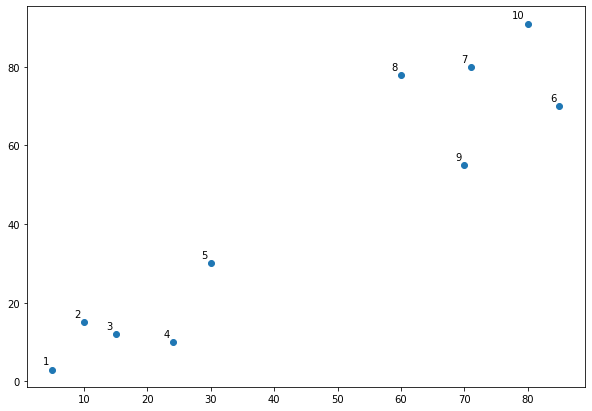

In [ ]:
# plotting the dataset
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]): plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.show()

### 1\.  Plot the dendogram for the data using a linkage type of 'single' as shown below

The libraries dendrogram and linkage were already imported during setup at the beginning of this notebook - please review their documentation online.

In [ ]:
type(X)

numpy.ndarray

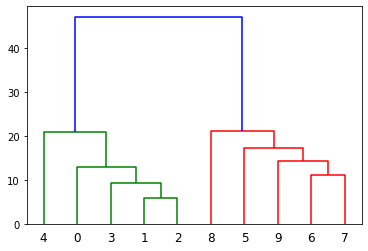

In [ ]:
Z = linkage(X, 'single')
dn = dendrogram(Z)
plt.show()